
# **Batimentos Cardiácos Análise**


**Este é um projeto com fins de aprendizado e não possui nenhuma intenção de análise médica ou diagnóstica. Por ser um projeto de aprendizado os comentários explicam cada passo do notebook de forma detalhada e mais didático possível.**

In [26]:
# Importando as bibliotecas que iremos utilizar
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
pd.set_option('mode.chained_assignment', None)

In [27]:
# Importando o dataset de um arquivo excel
data = pd.read_excel(r'C:\Users\enric\Documents\Dados_SmartWatch\HEARTRATE_AUTO\HEARTRATE_AUTO.xlsx')

In [28]:
""" Cria uma nova coluna chamada 'datetime' no DataFrame. 
Essa coluna é criada a partir da combinação das colunas 'date' e 'time', convertidas para o tipo de dado str. 
O resultado é a criação de um objeto do tipo datetime que representa a data e hora combinadas.
Em seguida, define a coluna 'datetime' como o índice do DataFrame 'data', isso significa que cada linha do DataFrame será 
indexada pelo valor do objeto datetime correspondente.
Por fim, cria uma nova coluna chamada 'hour'. 
Essa coluna é preenchida com o valor da hora extraído do índice do DataFrame, utilizando o atributo .hour dos objetos datetime. 
Isso atribui a cada linha do DataFrame o valor da hora correspondente ao índice, permitindo análises específicas por hora."""

data['datetime'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))
data = data.set_index('datetime')
data['hour'] = data.index.hour

In [29]:
"""O método groupby() é aplicado ao DataFrame 'data' e recebe a coluna 'hour' como argumento. 
Isso agrupa os dados com base nos valores únicos encontrados nessa coluna.

['heartRate']: Especifica que a operação de agregação será aplicada à coluna 'heartRate' do DataFrame 'data'.

O método mean() é aplicado ao grupo resultante, calculando a média dos valores da coluna 'heartRate' para cada grupo.

O resultado dessa operação é atribuído à variável 'hourly_heart_rate', que contém uma nova série de dados 
com a média dos batimentos cardíacos agrupados por hora.
"""
hourly_heart_rate = data.groupby('hour')['heartRate'].mean()

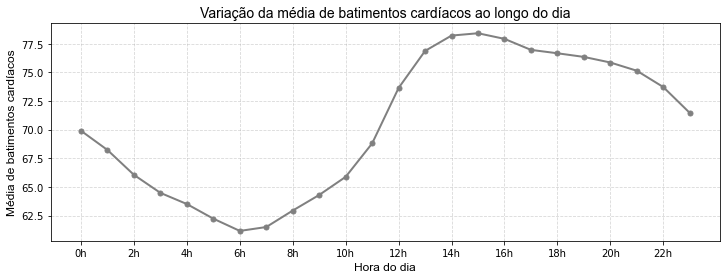

In [30]:
"""
Cria um gráfico com a média de batimentos cardíacos ao longo do dia, utilizando uma linha cinza contínua com marcadores circulares. 
Os rótulos dos eixos x e y são definidos, juntamente com um título. 
Uma grade é adicionada ao gráfico. 
Em seguida, são definidas as marcações a cada 2 horas no eixo x, com rótulos personalizados que incluem o sufixo 'h' para representar horas. 
Finalmente, o gráfico é exibido.
"""

plt.figure(figsize=(12,4))
plt.plot(hourly_heart_rate, color='gray', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.xlabel('Hora do dia', fontname='Arial', fontsize=12)
plt.ylabel('Média de batimentos cardíacos', fontname='Arial', fontsize=12)
plt.title('Variação da média de batimentos cardíacos ao longo do dia', fontname='Arial', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Definir marcações a cada 2 horas
plt.xticks(range(0, len(hourly_heart_rate), 2), rotation=0)

# Adicionar 'h' após as marcações de horas
hours = [hour for hour in range(0, len(hourly_heart_rate), 2)]
hour_labels = [f'{hour}h' for hour in hours]
plt.gca().set_xticklabels(hour_labels)

# Plota o gráfico
plt.show()


# **Análise de anomalias cardiacas**

In [31]:
heart_rate = data['heartRate']


In [32]:
"""
Cria um modelo Elliptic Envelope* para detecção de anomalias, com uma taxa de contaminação de 0.001. 
Em seguida, o modelo é ajustado aos valores dos batimentos cardíacos, que são reformulados em uma matriz unidimensional.

*O modelo Elliptic Envelope é uma técnica de detecção de anomalias que busca identificar pontos de dados que diferem 
significativamente do padrão geral dos dados.
"""
model = EllipticEnvelope(contamination=0.001)
model.fit(heart_rate.values.reshape(-1, 1))

EllipticEnvelope(contamination=0.001)

In [33]:
"""
Encontra anomalias usando o modelo criado anteriormente nos valores de batimentos cardíacos e atribui as previsões ao DataFrame 'data',
adicionando uma nova coluna chamada 'anomaly'.
 """
anomalies = model.predict(heart_rate.values.reshape(-1, 1))
data['anomaly'] = anomalies


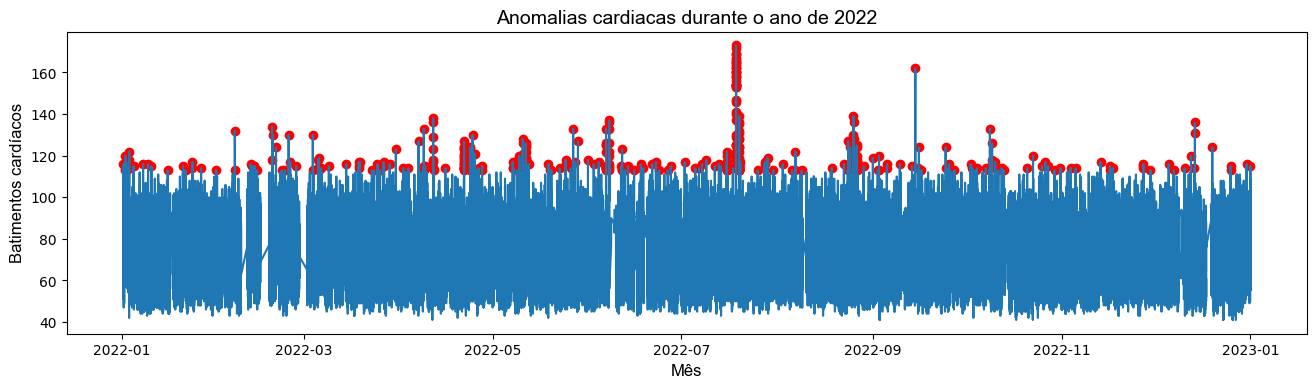

In [34]:
"""
Cria um gráfico de linha dos valores de batimentos cardíacos ao longo do tempo, com pontos vermelhos marcando as anomalias identificadas. 
Também define os rótulos dos eixos x e y, o título do gráfico, e exibe o gráfico resultante.
"""
plt.figure(figsize=(16,4), dpi=100)
plt.plot(data.index, data['heartRate'])
plt.scatter(data[data['anomaly'] == -1].index, data[data['anomaly'] == -1]['heartRate'], color='red')
plt.xlabel('Mês', fontname='Arial', fontsize=12)
plt.ylabel('Batimentos cardíacos', fontname='Arial', fontsize=12)
plt.title('Anomalias cardiacas durante o ano de 2022', fontname='Arial', fontsize=14)

plt.show()